In [201]:
#Imports

#Data
import pandas as pd
import numpy as np

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#ML
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report

from sklearn.preprocessing import OneHotEncoder

#-------------------------------------------------------------------

data_file='wrang_xyz_data.csv'

financial_data=['total_rev_hi_lim','tot_cur_bal','tot_coll_amt','revol_util','loan_amnt','dti','revol_bal']
loan_data=['purpose','initial_list_status','term']
emp_data=['emp_length','collections_12_mths_ex_med','acc_now_delinq','home_ownership','annual_inc','verification_status','zip_code','addr_state','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','total_acc']
date_data=['earliest_cr_line']
pred_data=['issue_d','default_ind']
inn=['initial_list_status','last_pymnt_amnt','total_pymnt','total_rec_int','total_rec_late_fee']
out=['initial_list_status','last_credit_pull_d','last_pymnt_amnt','total_pymnt','total_rec_int','int_rate','out_prncp','total_rec_late_fee']
features=financial_data+loan_data+emp_data+date_data




C:\Users\mmoy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[[245  66]
 [180 131]]
              precision    recall  f1-score   support

           0       0.58      0.79      0.67       311
           1       0.66      0.42      0.52       311

    accuracy                           0.60       622
   macro avg       0.62      0.60      0.59       622
weighted avg       0.62      0.60      0.59       622



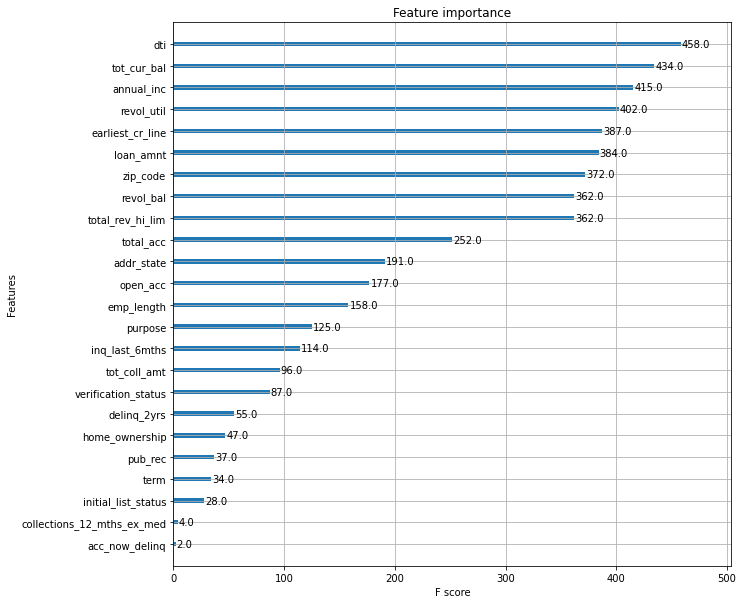

In [202]:
def get_model_class(data_file='wrang_xyz_data.csv',split='date',model_type='xgb'):
    #Random splitting
    df = pd.read_csv('data/'+data_file,usecols=features+pred_data)

    if split=='random':
        X=df.drop(['default_ind','issue_d'],axis=1)
        y=df['default_ind']

        undersample = RandomUnderSampler(sampling_strategy='majority')
        X,y = undersample.fit_resample(X, y)

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)

    else:
        X=df.drop('default_ind',axis=1)
        y=df[['default_ind','issue_d']]

        X_train=X[X['issue_d']<=20150501].drop('issue_d',axis=1)
        X_test=X[X['issue_d']>20150501].drop('issue_d',axis=1)

        y_train=y[y['issue_d']<=20150501]['default_ind']
        y_test=y[y['issue_d']>20150501]['default_ind']

        undersample = RandomUnderSampler(sampling_strategy='majority')
        X_train,y_train = undersample.fit_resample(X_train, y_train)
        X_test,y_test = undersample.fit_resample(X_test, y_test)

    if model_type=='xgb':
        model_class = xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss')
        model_class.fit(X_train,np.ravel(y_train))
        fig, ax = plt.subplots(figsize=(10,10))
        xgb.plot_importance(model_class,importance_type='weight', ax=ax)

    elif model_type=='lg_reg':
        model_class=LogisticRegression(max_iter=10*6)
        model_class.fit(X_train,np.ravel(y_train))

    else: 
        model_class = RandomForestClassifier()
        model_class.fit(X_train,np.ravel(y_train))

    y_class_pred = model_class.predict(X_test)
    print(confusion_matrix(y_test, y_class_pred))
    print(classification_report(y_test, y_class_pred))

    return model_class

model_class=get_model_class(split='date',model_type='xgb')